In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [14]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

青蛙


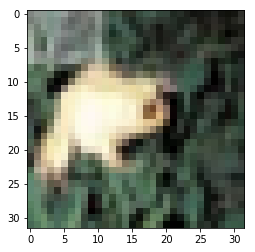

In [20]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(trans[y_train[c][0]])
plt.imshow(x_train[c])

In [21]:
# 圖片: 處理0~1
x_train_nor = x_train / 255
x_test_nor = x_test / 255

In [22]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
cnn = Sequential()
# CNN(眼睛)
# 一個filter(27) * 32個 + bias數目(32)
cnn.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D((2, 2)))
# 288 * 64 + 64 = 18496
cnn.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D((2, 2)))
# MLP(大腦)
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [28]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
cnn.fit(x_train_nor, y_train_cat,
        batch_size=200, epochs=10, 
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 56s - loss: 1.5835 - acc: 0.4279 - val_loss: 1.3385 - val_acc: 0.5320
Epoch 2/10
 - 54s - loss: 1.1682 - acc: 0.5867 - val_loss: 1.0864 - val_acc: 0.6154
Epoch 3/10
 - 56s - loss: 0.9872 - acc: 0.6558 - val_loss: 0.9294 - val_acc: 0.6788
Epoch 4/10
 - 53s - loss: 0.8945 - acc: 0.6915 - val_loss: 0.9285 - val_acc: 0.6816
Epoch 5/10
 - 55s - loss: 0.7911 - acc: 0.7294 - val_loss: 0.8247 - val_acc: 0.7162
Epoch 6/10
 - 55s - loss: 0.7198 - acc: 0.7514 - val_loss: 0.8028 - val_acc: 0.7210
Epoch 7/10
 - 55s - loss: 0.6503 - acc: 0.7729 - val_loss: 0.7901 - val_acc: 0.7346
Epoch 8/10
 - 53s - loss: 0.5901 - acc: 0.7946 - val_loss: 0.7438 - val_acc: 0.7496
Epoch 9/10
 - 53s - loss: 0.5300 - acc: 0.8166 - val_loss: 0.7567 - val_acc: 0.7490
Epoch 10/10
 - 53s - loss: 0.4755 - acc: 0.8339 - val_loss: 0.7828 - val_acc: 0.7372


In [31]:
cnn.evaluate(x_test_nor, y_test_cat)

10000/10000 [==============================] - 5s 475us/step


[0.8286413027763366, 0.7236]

In [43]:
import numpy as np
pre = cnn.predict_classes(x_test_nor)
idx = np.nonzero(pre != y_test.reshape(10000))[0]
print("猜錯有幾個:", len(idx))

猜錯有幾個: 2764


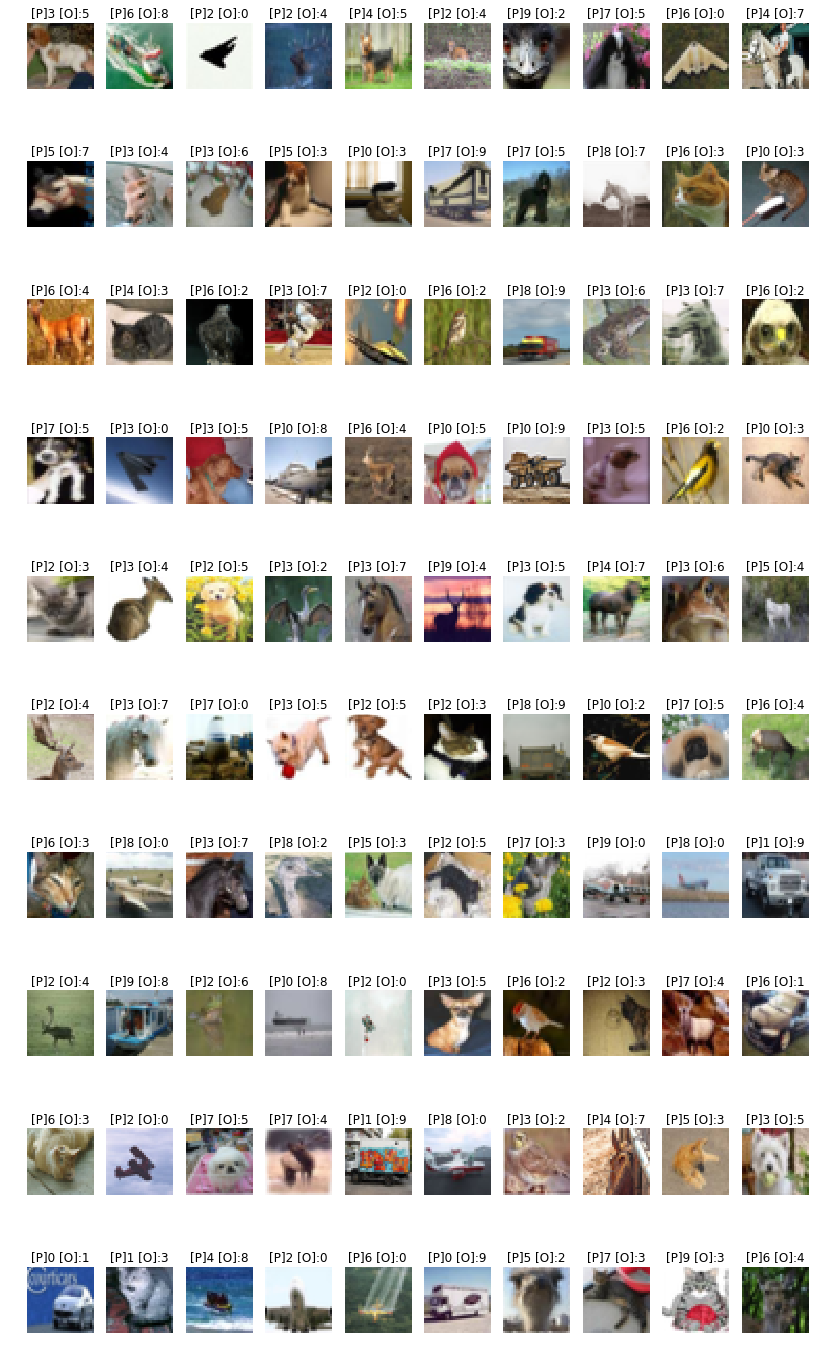

In [47]:
#trans = ["飛機", "汽車", "鳥", "貓", "鹿",
#         "狗", "青蛙", "馬", "船", "卡車"]
plt.figure(figsize=(14, 25))
width = 10
height = 10
false_img = x_test[idx[:100]]
false_pre = pre[idx[:100]]
false_ori = y_test[idx[:100]]
for i, img in enumerate(false_img):
    t = "[P]" + str(false_pre[i]) + " [O]:" + str(false_ori[i][0])
    plt.subplot(height, width, i + 1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

In [50]:
# http://support.hdfgroup.org/ftp/HDF5/hdf-java/current/bin/HDFView-2.14-win_32.zip
cnn.save("cnn.h5")

In [51]:
from keras.models import load_model
load = load_model("cnn.h5")
load.evaluate(x_test_nor, y_test_cat)
# 如果你要繼續訓練, 不用compile, 直接fit

10000/10000 [==============================] - 5s 470us/step


[0.8286413027763366, 0.7236]